# Module 2 Part 2.1 -- Exploring and Preparing Data

In [40]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('fivethirtyeight')
mpl.rcParams.update(mpl.rcParamsDefault)

df = pd.read_csv('/Users/stalinjaquez/Desktop/VSCode/IBM Data Certificate/Course11_Applied_Data_Science_Capstone/dataset_part_2.csv')
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
pd.set_option('display.expand_frame_repr',False)

#### We can plot out the FlightNumber vs. PayloadMassand overlay the outcome of the launch. 

<Figure size 1800x600 with 0 Axes>

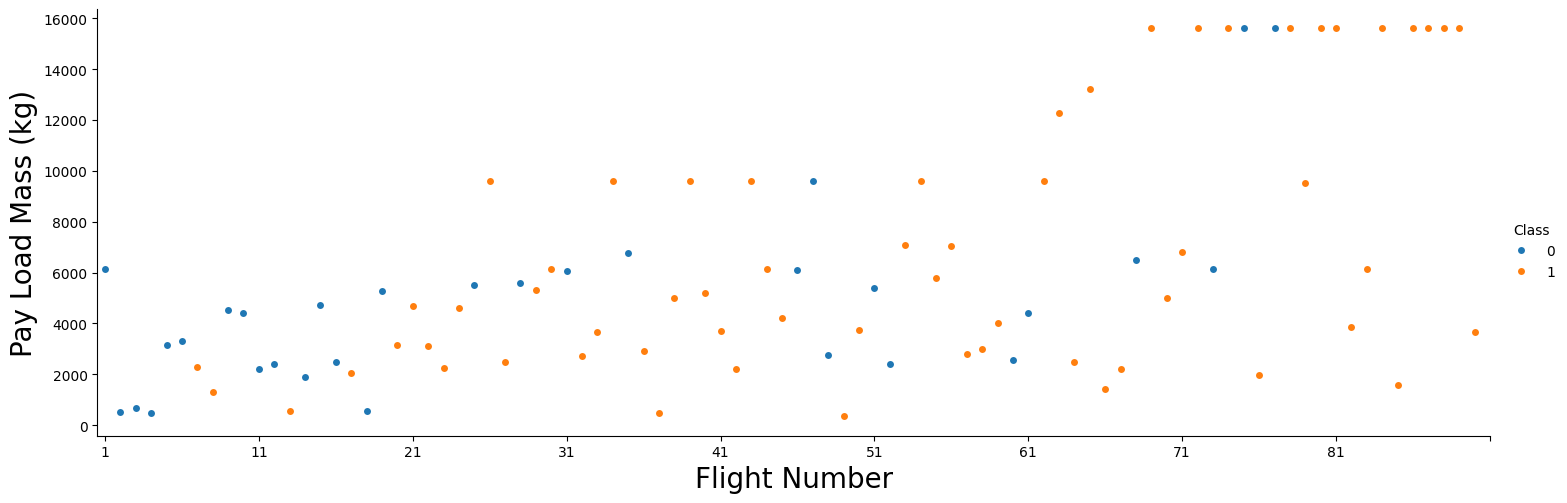

In [41]:
plt.figure(figsize=(18,6))
sns.catplot(y=df["PayloadMass"], x=df['FlightNumber'], hue=df["Class"], aspect = 3)
plt.xticks(np.arange(0, df['FlightNumber'].max()+1, step=10))
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay Load Mass (kg)",fontsize=20)
plt.show()

### TASK 1: Visualize the relationship between Flight Number and Launch Site
#### Use the function catplot to plot FlightNumber vs LaunchSite, set the parameter x parameter to FlightNumber,set the y to Launch Site and set the parameter hue to 'class'.

<Figure size 1800x600 with 0 Axes>

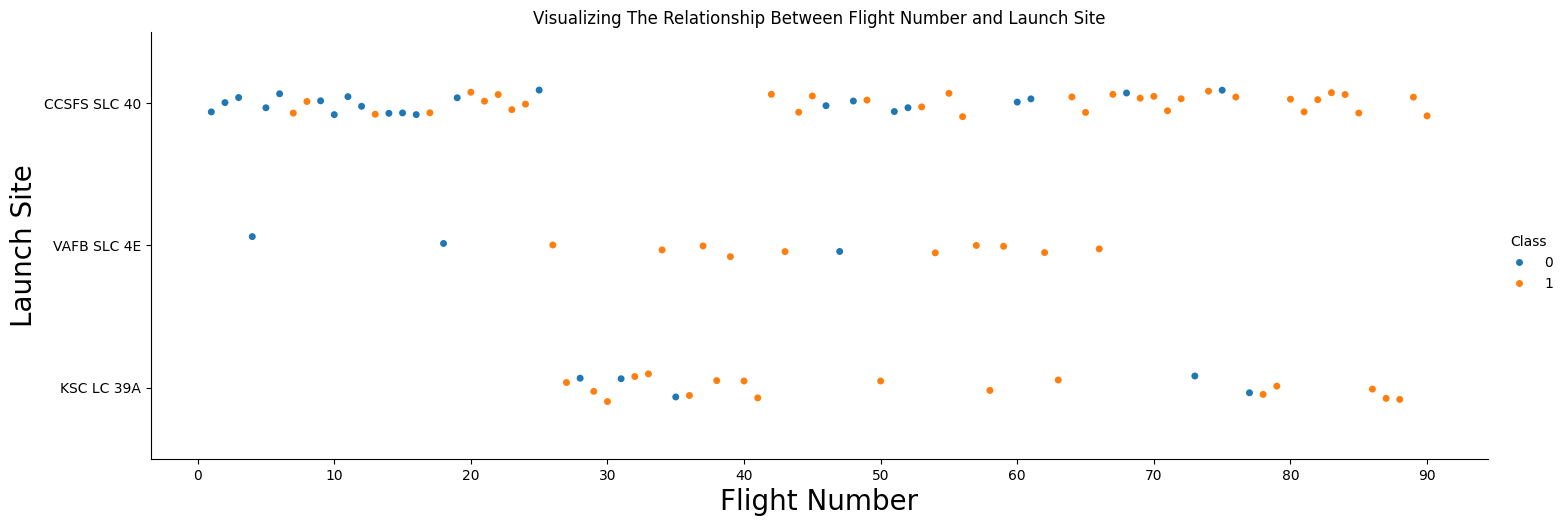

In [42]:
plt.figure(figsize=(18,6))
sns.catplot(y=df["LaunchSite"], x=df['FlightNumber'], hue=df["Class"], aspect = 3)
plt.xticks(np.arange(0, df['FlightNumber'].max()+1, step=10))
plt.title('Visualizing The Relationship Between Flight Number and Launch Site')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### TASK 2: Visualize the relationship between Payload Mass and Launch Site. 
#### Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value. 

<Figure size 1800x600 with 0 Axes>

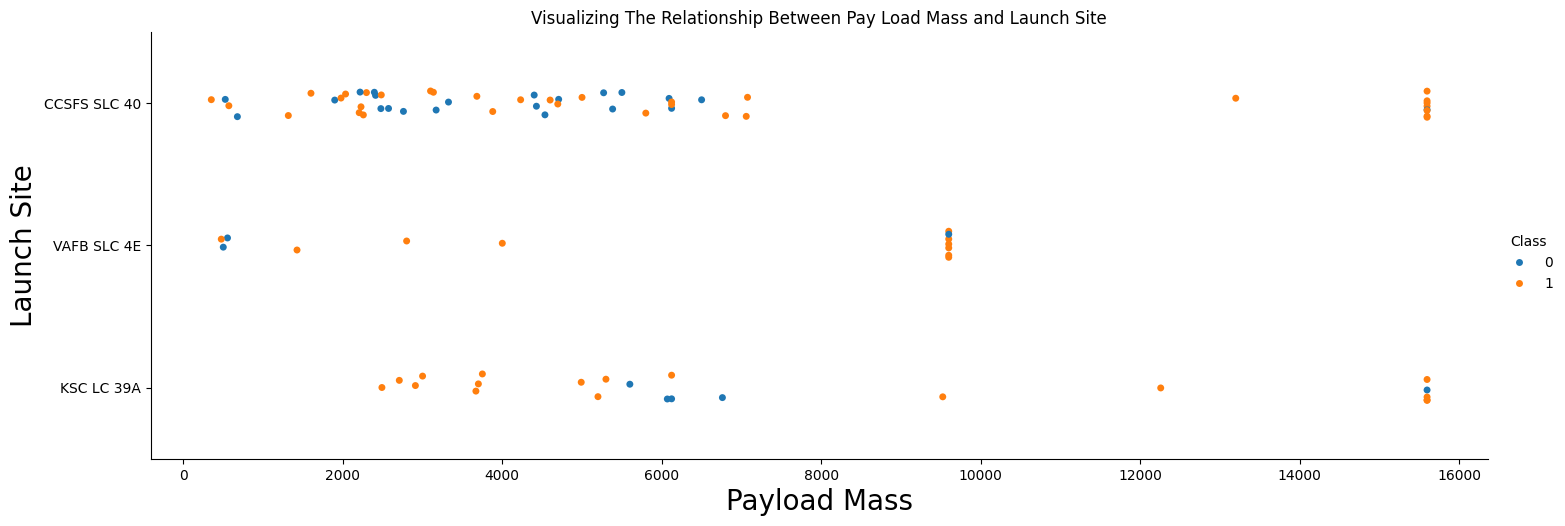

In [43]:
plt.figure(figsize=(18,6))
sns.catplot(y=df["LaunchSite"], x=df['PayloadMass'], hue=df["Class"], aspect = 3)
plt.title('Visualizing The Relationship Between Pay Load Mass and Launch Site')
plt.xlabel("Payload Mass",fontsize=20)
plt.ylabel("Launch Site",fontsize=20)
plt.show()

### TASK 3: Visualize the relationship between success rate of each orbit type.
#### Next, we want to visually check if there are any relationship between success rate and orbit type.Let's create a bar chart for the sucess rate of each orbit.
#### HINT use groupby method on Orbit column and get the mean of Class column.

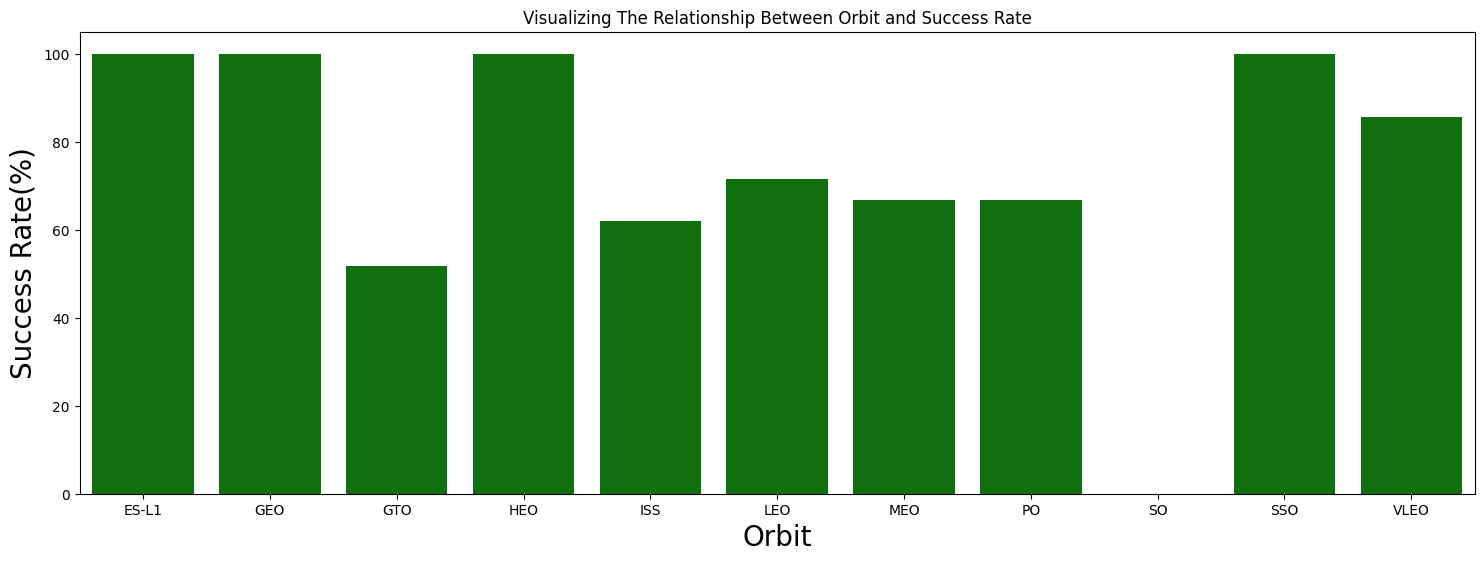

In [44]:
og = df.groupby('Orbit')['Class'].mean().to_frame()
og.reset_index(inplace=True)
og.columns = ['Orbit','Success Rate']
og['Success Rate'] = (og['Success Rate'] * 100).round(2)

plt.figure(figsize=(18,6))
sns.barplot(y=og["Success Rate"], x=og['Orbit'],color='green')
plt.title('Visualizing The Relationship Between Orbit and Success Rate')
plt.xlabel("Orbit",fontsize=20)
plt.ylabel("Success Rate(%)",fontsize=20)
plt.show()


### TASK 4: Visualize the relationship between FlightNumber and Orbit type.
#### Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value.

<Figure size 1800x600 with 0 Axes>

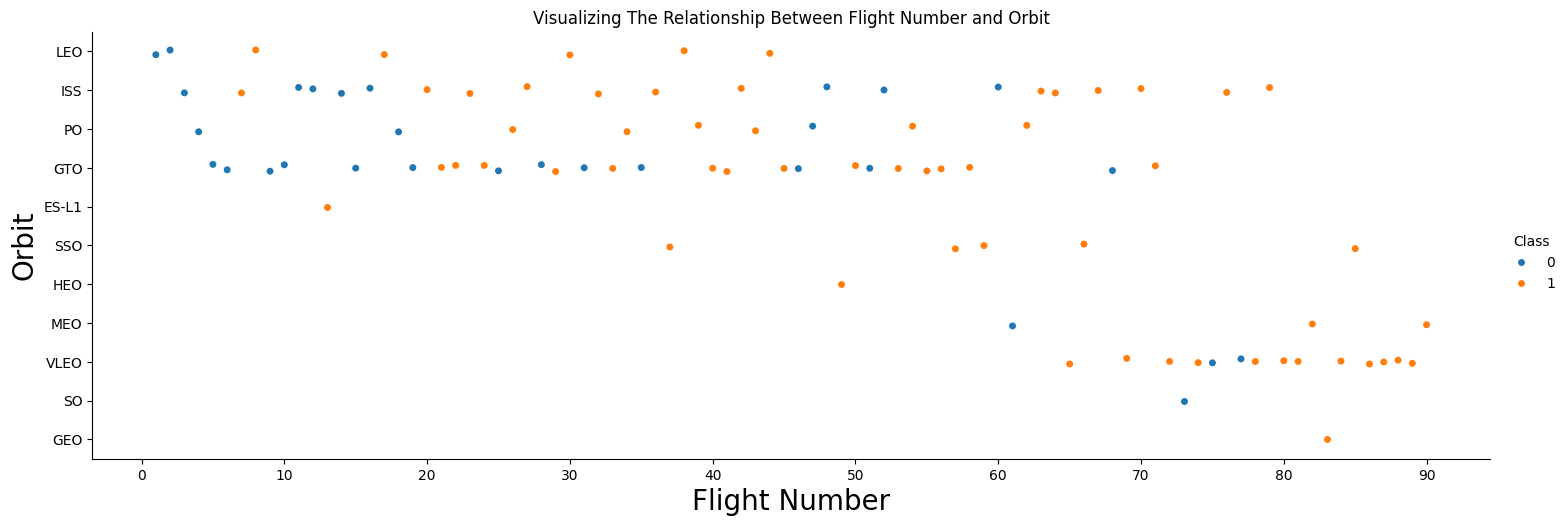

In [45]:
plt.figure(figsize=(18,6))
sns.catplot(y=df["Orbit"], x=df['FlightNumber'], hue=df["Class"], aspect = 3)
plt.xticks(np.arange(0, df['FlightNumber'].max()+1, step=10))
plt.title('Visualizing The Relationship Between Flight Number and Orbit')
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Orbit",fontsize=20)
plt.show()



### TASK 5: Visualize the relationship between Payload Mass and Orbit type.
#### Plot a scatter point chart with x axis to be Payload Mass and y axis to be the Orbit, and hue to be the class value. 

<Figure size 1800x600 with 0 Axes>

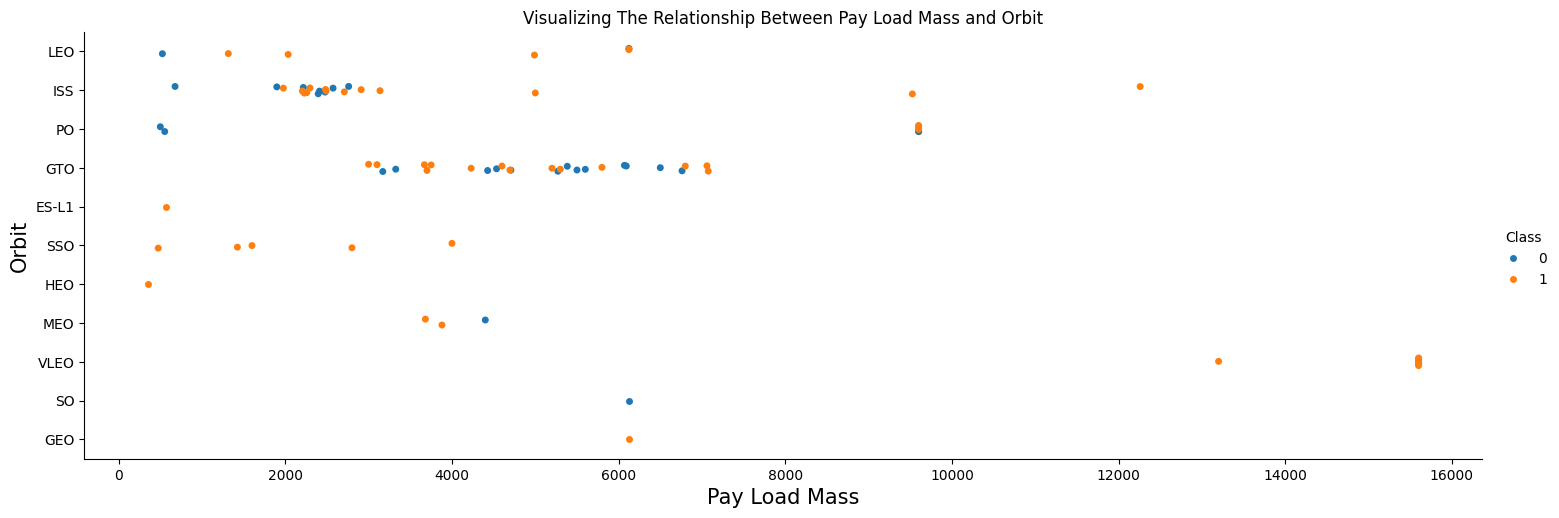

In [46]:
plt.figure(figsize=(18,6))
sns.catplot(y=df["Orbit"], x=df['PayloadMass'], hue=df["Class"], aspect = 3)
plt.title('Visualizing The Relationship Between Pay Load Mass and Orbit')
plt.xlabel("Pay Load Mass",fontsize=15)
plt.ylabel("Orbit",fontsize=15)
plt.show()


### TASK 6: Visualize the launch success yearly trend.
#### You can plot a line chart with x axis to be Year and y axis to be average success rate, to get the average launch success trend.
#### A function to Extract years from the date.

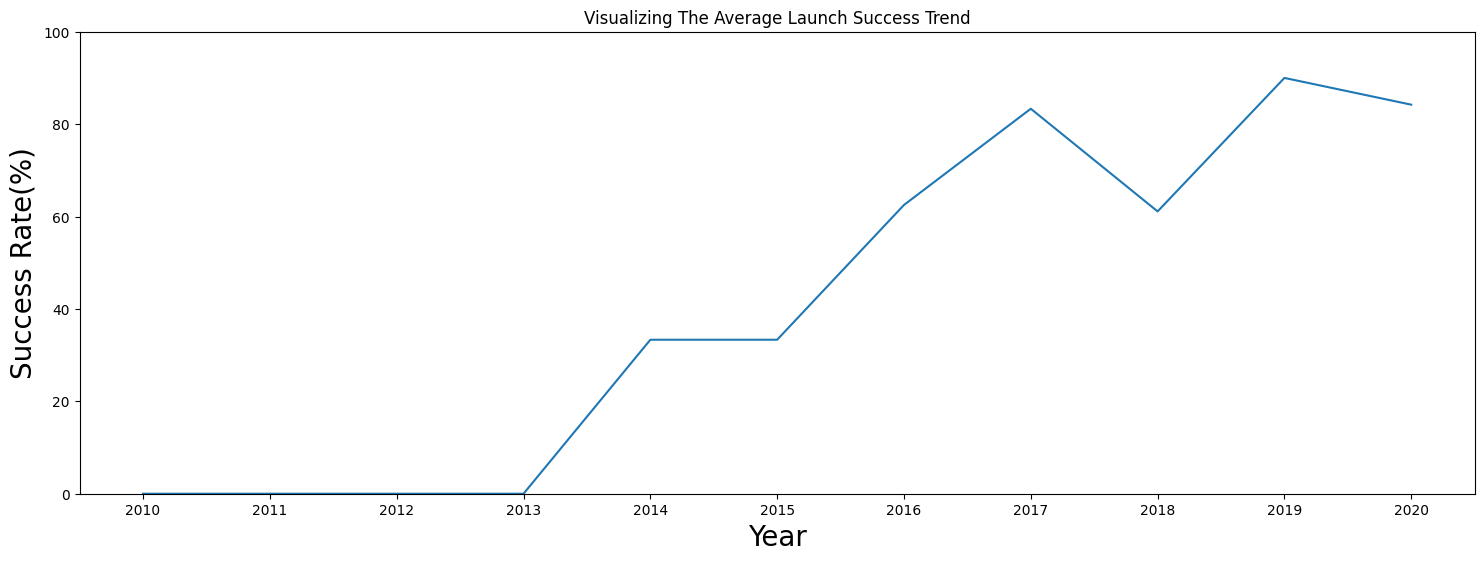

In [47]:
year=[]
def Extract_year():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
Extract_year()
df['Date'] = year

dsr = df.groupby('Date')['Class'].mean().to_frame()
dsr.reset_index(inplace=True)
dsr.columns = ['Date','Success Rate']
dsr['Success Rate'] = (dsr['Success Rate'] * 100).round(2)
dsr['Date'] = dsr['Date'].astype(int)

plt.figure(figsize=(18,6))
sns.lineplot(x=dsr['Date'],y=dsr['Success Rate'] )
plt.title('Visualizing The Average Launch Success Trend')
plt.xticks(np.arange(2010, dsr['Date'].max()+1, step=1))
plt.xlabel("Year",fontsize=20)
plt.ylabel("Success Rate(%)",fontsize=20)
plt.ylim(0, 100)
plt.show()

### Features Engineering

In [48]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

### TASK 7: Create dummy variables to categorical columns. 
#### Use the function get_dummies and features dataframe to apply OneHotEncoder to the column Orbits, LaunchSite, LandingPad, and Serial. 
#### Assign the value to the variable features_one_hot, display the results using the method head. Your result dataframe must include all features including the encoded ones.

In [49]:
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

### TASK 8: Cast all numeric columns to float64. 
#### Now that our features_one_hot dataframe only contains numbers, cast the entire dataframe to variable type float64. 

In [51]:
features_one_hot = features_one_hot.astype(float)

#### We can now export it to a CSV for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range.

In [50]:
features_one_hot.to_csv('IBM Data Certificate/Course11_Applied_Data_Science_Capstone/dataset_part_3.csv', index=False)

OSError: Cannot save file into a non-existent directory: 'IBM Data Certificate/Course11_Applied_Data_Science_Capstone'